In [37]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Load the dataset
file_path = "../data/cleaned_cognitive_decline.csv"
df = pd.read_csv(file_path)

# display the first few rows
df.head()

,Year,Location,Percentage_Value,Low_Confidence_Limit,High_Confidence_Limit,Functional_Difficulties,Needs_Assistance,Cognitive_Decline,Consulted_Professional,q_Interferes_Activities,q_Needs_Assistance,q_Worsening_Decline,q_Consulted_Professional,Small_Sample_Size,No_Data_Available,Regional_Issue,Few_States_Reported,Age_Group,Race_Ethnicity
0,2022,Arizona,31.6,23.5,41.0,1,0,0,0,1,0,0,0,0,0,0,0,Overall,Not Specified
1,2022,Arizona,32.7,22.7,43.3,1,0,0,0,1,0,0,0,1,0,0,0,50-64 years,Hispanic
2,2022,Arizona,19.9,14.0,27.3,1,0,0,0,1,0,0,0,0,0,0,0,65 years or older,"White, non-Hispanic"
3,2022,Arizona,32.7,22.7,43.3,1,0,0,0,1,0,0,0,1,0,0,0,65 years or older,Native Am/Alaskan Native
4,2022,Arizona,32.7,22.7,43.3,1,0,0,0,1,0,0,0,1,0,0,0,Overall,"Black, non-Hispanic"


In [3]:
# get general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22182 entries, 0 to 22181
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      22182 non-null  int64  
 1   Location                  22182 non-null  object 
 2   Percentage_Value          22182 non-null  float64
 3   Low_Confidence_Limit      22182 non-null  float64
 4   High_Confidence_Limit     22182 non-null  float64
 5   Functional_Difficulties   22182 non-null  int64  
 6   Needs_Assistance          22182 non-null  int64  
 7   Cognitive_Decline         22182 non-null  int64  
 8   Consulted_Professional    22182 non-null  int64  
 9   q_Interferes_Activities   22182 non-null  int64  
 10  q_Needs_Assistance        22182 non-null  int64  
 11  q_Worsening_Decline       22182 non-null  int64  
 12  q_Consulted_Professional  22182 non-null  int64  
 13  Small_Sample_Size         22182 non-null  int64  
 14  No_Dat

In [4]:
# get summary statistics of numerical columns
df.describe()

,Year,Percentage_Value,Low_Confidence_Limit,High_Confidence_Limit,Functional_Difficulties,Needs_Assistance,Cognitive_Decline,Consulted_Professional,q_Interferes_Activities,q_Needs_Assistance,q_Worsening_Decline,q_Consulted_Professional,Small_Sample_Size,No_Data_Available,Regional_Issue,Few_States_Reported
count,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000
mean,2018.617528,31.964480,22.987368,41.990939,0.245379,0.245424,0.263908,0.245289,0.245379,0.245424,0.263908,0.245289,0.266477,0.096249,0.146425,0.038951
std,2.278708,13.333387,10.234771,16.333354,0.430321,0.430348,0.440760,0.430268,0.430321,0.430348,0.440760,0.430268,0.442127,0.294939,0.353540,0.193481
min,2015.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,27.000000,17.800000,37.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,32.700000,22.700000,43.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.000000,37.700000,27.100000,48.600000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2022.000000,100.000000,97.100000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# get unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Location: 57 unique values
Age_Group: 3 unique values
Race_Ethnicity: 6 unique values


### 1. Exploratory Data Analysis (EDA)

#### 1.1 Distribution of `Percentage_Value`
- Helps to see the spread of the reported cognitive decline percentages.
- Identifies whether data is skewed or normally distributed.

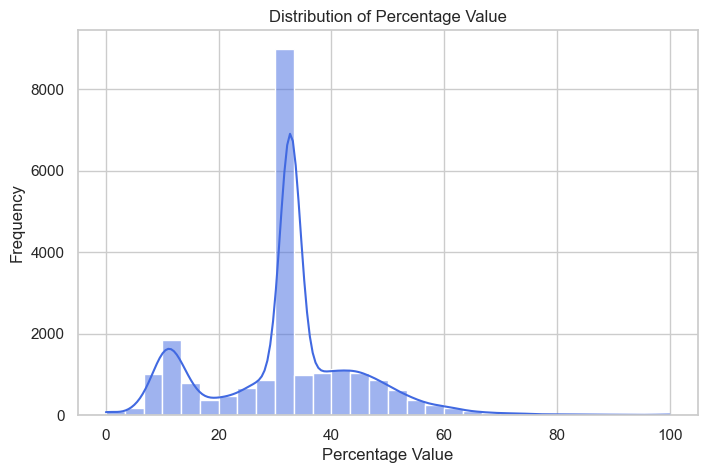

In [12]:
# histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Percentage_Value"], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Percentage Value")
plt.xlabel("Percentage Value")
plt.ylabel("Frequency")
plt.show()

**Observations**:
1. **Skewed Distribution**
   - The data is **not normally distributed.**
   - There is a **sharp peak** around **30-40%**, suggesting many respondents reported cognitive decline in this range.

2. **Multiple Peaks (Multimodal Distribution)**
    - The data appears to have multiple clusters.
    - One smaller peak around **15-20%** and another near **50%+**

3. **Long Tail Towards Higher Values**
    - Some cases show **higher percentages of cognitive decline**, but these are **less frequent**.

#### 1.2 Trends Over Time (`Year`)
- Understand if cognitive decline rates are increasing or stable over the years.

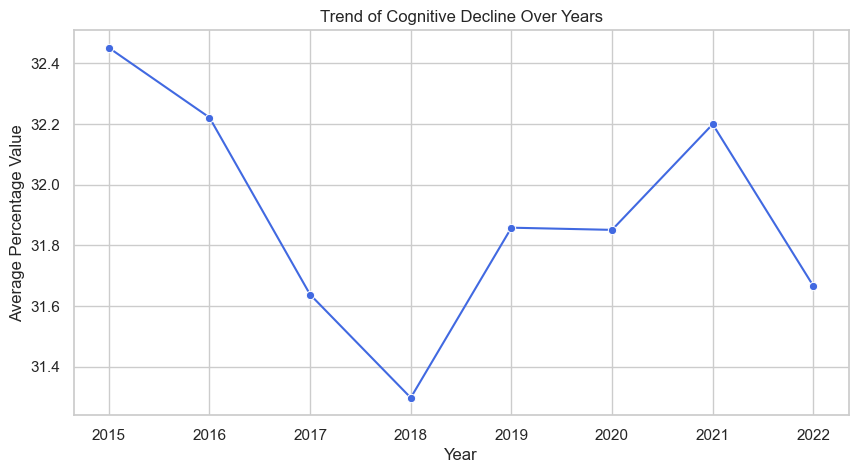

In [14]:
# line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Year", y="Percentage_Value",
             estimator="mean", errorbar=None, marker="o",
             color="royalblue")
plt.title("Trend of Cognitive Decline Over Years")
plt.xlabel("Year")
plt.ylabel("Average Percentage Value")
plt.grid(True)
plt.show()

**Observations:**
- Cognitive decline rates **decreased** from around **32.4% in 2015** to a low of **31.4% in 2018**.
- After reaching the lowest point in 2018 (~31.4%), cognitive decline reports **increased sharply** in 2019.
- After the increase in 2019, there was a **small drop** in 2020.
- 2021 saw one of the **highest jumps** in cognitive decline reports (~32.2%).
- The percentage **dropped in 2022**, though still higher than 2018 levels.

#### 1.3 Cognitive Decline by `Age_Group`
- See if cognitive decline varies significantly by age.

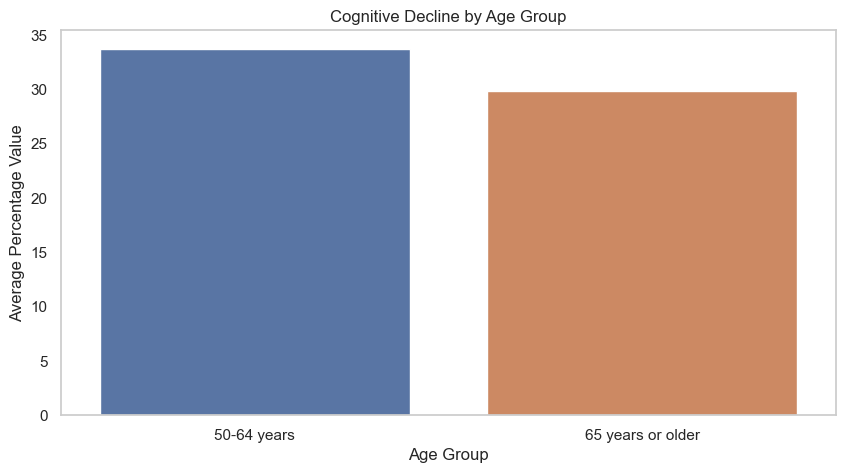

In [18]:
# bar plot
plt.figure(figsize=(10, 5))
df_filtered = df[df["Age_Group"] != "Overall"]
sns.barplot(data=df_filtered, x="Age_Group", y="Percentage_Value", 
            estimator="mean", errorbar=None, hue="Age_Group",
           dodge=False)
plt.title("Cognitive Decline by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Percentage Value")
plt.grid(axis="y")
plt.show()

**Observations**:
1. **Higher reported cognitive decline in the 50-64 age group**
   - This could indicate that middle-aged adults are more likely to report cognitive issues compared to seniors.

2. **Slightly lower percentage for 65+ years**
    - This might be due to different self-reporting behaviors, better medical awareness, or survival bias (fewer individuals surveyed at older ages).

#### 1.4 Cognitive Decline by `Race_Ethnicity`
- Identify if cognitive decline rates differ across races/ethnicities

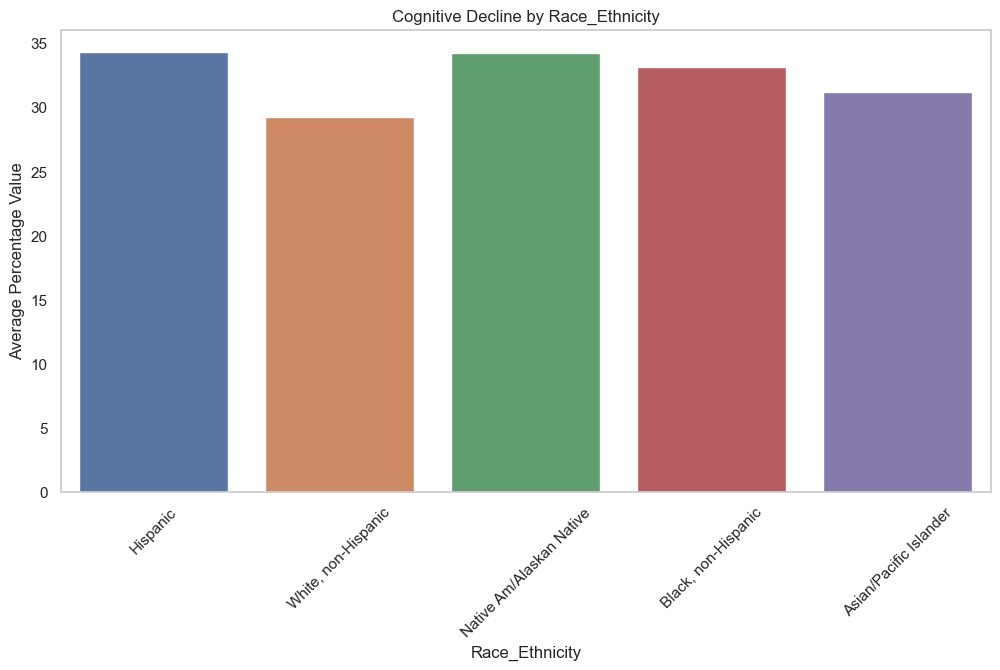

In [21]:
# bar plot
plt.figure(figsize=(12, 6))
df_filtered = df[df["Race_Ethnicity"] != "Not Specified"]
sns.barplot(data=df_filtered, x="Race_Ethnicity", y="Percentage_Value", 
            estimator="mean", errorbar=None, hue="Race_Ethnicity",
           dodge=False)
plt.title("Cognitive Decline by Race_Ethnicity")
plt.xlabel("Race_Ethnicity")
plt.ylabel("Average Percentage Value")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

**Observations**:
1. **Highest Cognitive Decline Rates**:
   - **Native American/Alaskan Native** and **Hispanic** groups report the highest cognitive decline percentages.
   - This could indicate disparities in healthcare access, lifestyle factors, or increased awareness/reporting.

2. **Moderate Decline Rates**:
    - **Black, Non-Hispanic** and **Asian/Pacific Islander** groups have slightly lower rates but remain high.

3. **Lowest Decline Rates**:
    - **White, Non-Hispanic** group shows the lowest reported cognitive decline.

#### 1.5 Correlation Between Variables
- Understand relationships between `Percentage_Value`, confidence intervals, and other factors.

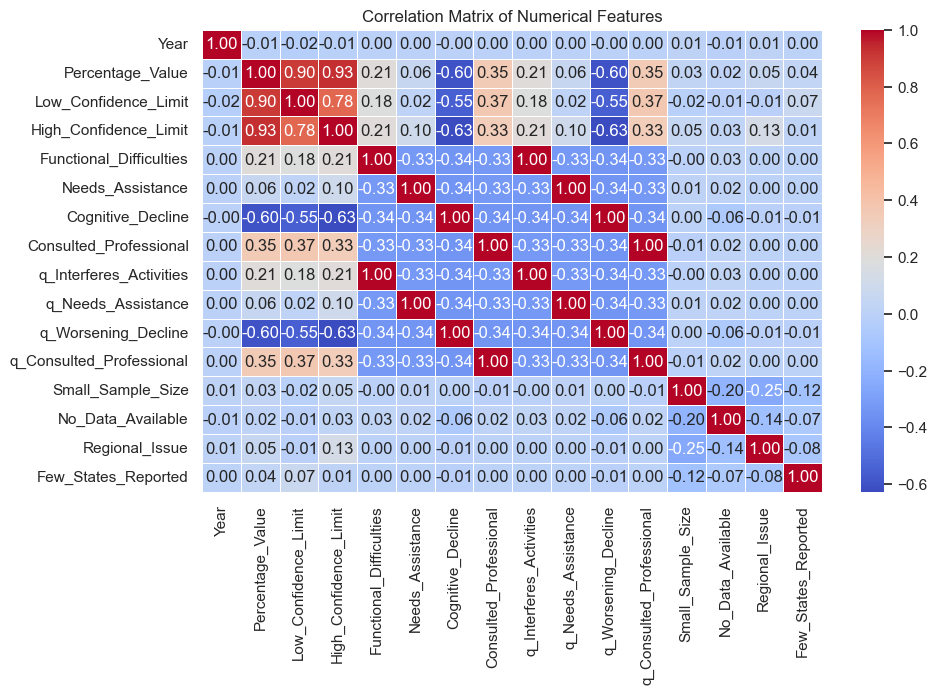

In [23]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", 
            fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**Observations**:
1. **`Percentage_Value` vs. Confidence Intervals**
   - `Percentage_Value` has a **strong positive correlation** with:
     1. `Low_Confidence_Limit` **(0.90)**
     2. `High_Confidence_Limit` **(0.93)**
    - This makes sense because confidence intervals are derived from the reported percentage values.

2. **`Cognitive_Decline` vs. `Percentage_Value`**
    - Moderate **negative correlation (-0.60)**
    - Indicates that **as cognitive decline is reported, percentage values shift.**